# EQUITY BARRIER OPTIONS - VALUATION ANALYSIS

Valuation and Risk of Equity Barrier Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 22:40 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Types of Barrier Option

In [3]:
for barrierType in EquityBarrierTypes:
    print(barrierType)

EquityBarrierTypes.DOWN_AND_OUT_CALL
EquityBarrierTypes.DOWN_AND_IN_CALL
EquityBarrierTypes.UP_AND_OUT_CALL
EquityBarrierTypes.UP_AND_IN_CALL
EquityBarrierTypes.UP_AND_OUT_PUT
EquityBarrierTypes.UP_AND_IN_PUT
EquityBarrierTypes.DOWN_AND_OUT_PUT
EquityBarrierTypes.DOWN_AND_IN_PUT


## Market Environment

In [4]:
interest_rate = 0.05

In [5]:
valuation_date = Date(1, 9, 2020)

In [6]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [7]:
dividend_yield = 0.01

In [8]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [9]:
volatility = 0.20

In [10]:
model = BlackScholes(volatility)

## Simple Example: Up and Out Call

This is an option whose that knocks out if the barrier is crossed from below. We're at maturity !

In [11]:
expiry_date = Date(1, 9, 2020)
num_observations = 1

In [12]:
barrierType = EquityBarrierTypes.UP_AND_OUT_CALL

In [13]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [14]:
strike_price = 1.3
barrier_price = 1.45
stock_prices = np.linspace(1.2, 1.6, 100)

In [15]:
barrierOpt = EquityBarrierOption(expiry_date, strike_price, barrierType, barrier_price, num_observations)

In [16]:
values = barrierOpt.value(valuation_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Value')

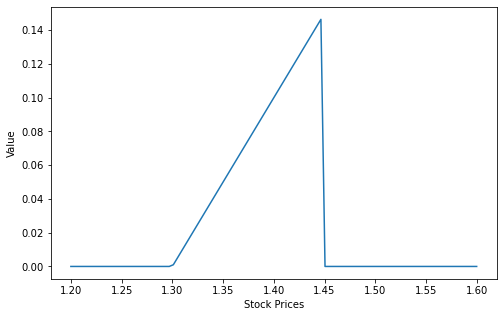

In [17]:
plt.figure(figsize=(8,5))
plt.plot(stock_prices, values)  
plt.xlabel("Stock Prices")
plt.ylabel("Value")

In [18]:
deltas = barrierOpt.delta(valuation_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Delta')

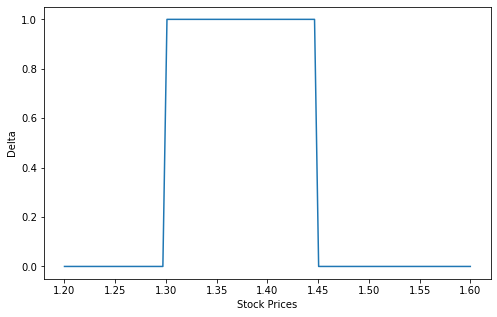

In [19]:
plt.figure(figsize=(8,5))
plt.plot(stock_prices, deltas)  
plt.xlabel("Stock Prices")
plt.ylabel("Delta")

## Test: IN + OUT barrier = VANILLA option

In [20]:
valuation_date = Date(1, 1, 2020)
expiry_date = Date(1, 1, 2021)
num_observations = (expiry_date - valuation_date)

In [21]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [22]:
stock_price = 105.0
strike_price = 100.0
barrier_price = 90.0

We examine all of the combinations of IN and OUT

In [23]:
barrierIn = EquityBarrierTypes.DOWN_AND_IN_CALL
barrierOut = EquityBarrierTypes.DOWN_AND_OUT_CALL
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)
v_in = barrierInOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_call = call_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_call, v_in + v_out)

0.8832988241620221 12.237089225373854 13.615686945010879 13.120388049535876


In [24]:
barrierIn = EquityBarrierTypes.UP_AND_IN_CALL
barrierOut = EquityBarrierTypes.UP_AND_OUT_CALL
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)
v_in = barrierInOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_call = call_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_call, v_in + v_out)

13.120388049535876 0.0 13.615686945010879 13.120388049535876


In [25]:
barrierIn = EquityBarrierTypes.DOWN_AND_IN_PUT
barrierOut = EquityBarrierTypes.DOWN_AND_OUT_PUT
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
put_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT)
v_in = barrierInOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_put = put_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_put, v_in + v_out)

4.0634334514721875 0.22466450447245556 4.088046709357336 4.288097955944643


In [26]:
barrierIn = EquityBarrierTypes.UP_AND_IN_PUT
barrierOut = EquityBarrierTypes.UP_AND_OUT_PUT
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
put_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT)
v_in = barrierInOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
v_put = put_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_put, v_in + v_out)

4.288097955944643 0.0 4.088046709357336 4.288097955944643


# Examining Barrier Values and Risk

In [27]:
barrier_price = 120.0
strike_price = 90.0

In [28]:
valuation_date = Date(1, 6, 2020)
expiry_date = Date(1, 12, 2020)

In [29]:
stock_prices = np.linspace(50,150,100)

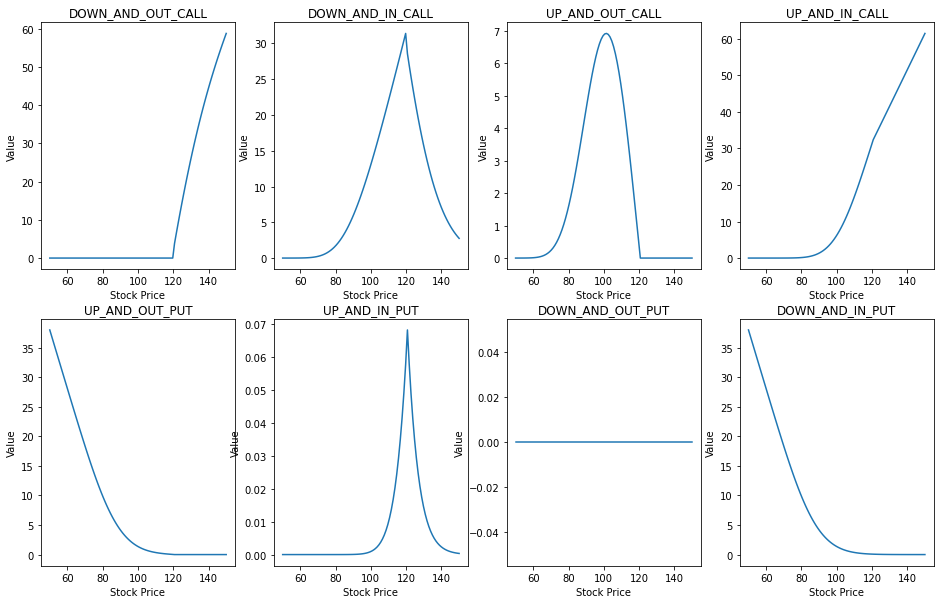

In [30]:
f1 = plt.figure(figsize=(16,10))
r = 1
for barrierType in EquityBarrierTypes:
    barrier_option = EquityBarrierOption(expiry_date, strike_price, barrierType, barrier_price, num_observations)
    v = barrier_option.value(valuation_date, stock_prices, discount_curve, dividend_curve, model)
    plt.subplot(2, 4, r)  
    r = r + 1

    plt.plot(stock_prices, v)  
    plt.title(barrierType.name)
    plt.xlabel("Stock Price")
    plt.ylabel("Value")

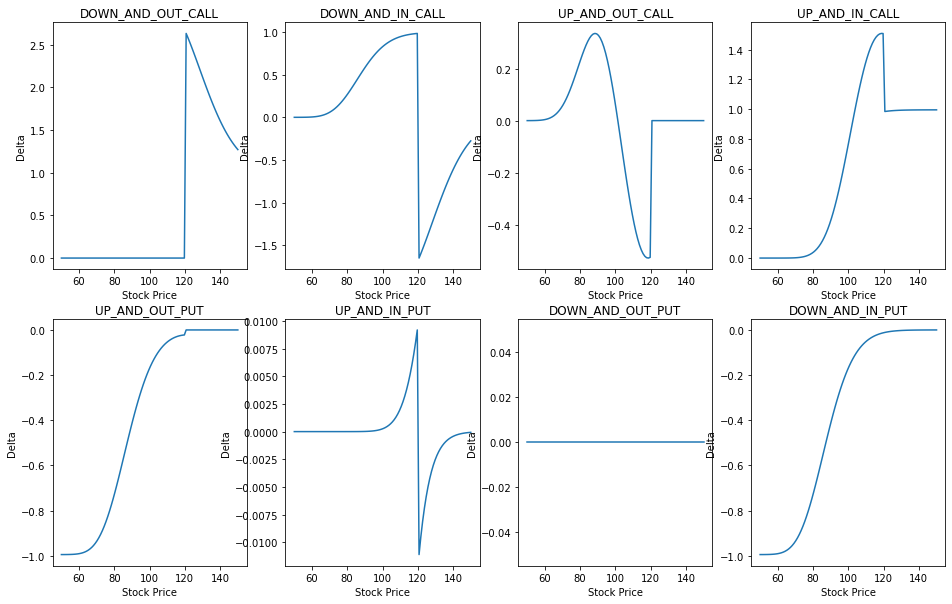

In [31]:
f1 = plt.figure(figsize=(16,10))
r = 1
for barrierType in EquityBarrierTypes:
    barrier_option = EquityBarrierOption(expiry_date, strike_price, barrierType, barrier_price, num_observations)
    v = barrier_option.delta(valuation_date, stock_prices, discount_curve, dividend_curve, model)
    plt.subplot(2, 4, r)  
    r = r +1
    plt.plot(stock_prices, v)  
    plt.title(barrierType.name)
    plt.xlabel("Stock Price")
    plt.ylabel("Delta")

Copyright (c) 2020 Dominic O'Kane